In [1]:
from TrafficLight import PeriodicTrafficLight, MemoryLessTrafficLight, AdaptiveTrafficLight, TrafficLightMirror
import Model1
import Model2
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML

**Traffic lights**

In [2]:
periodic_ew1 = PeriodicTrafficLight()
periodic_ew1.initialize(period=30, time_delay=0)

periodic_ns1 = TrafficLightMirror()
periodic_ns1.initialize(traffic_light=periodic_ew1)

periodic_ew2 = PeriodicTrafficLight()
periodic_ew2.initialize(period=60, time_delay=10)

periodic_ns2 = TrafficLightMirror()
periodic_ns2.initialize(traffic_light=periodic_ew2)

In [2]:
adaptive_ew1 = AdaptiveTrafficLight()
adaptive_ew1.initialize(sensor_depth=8, rule=2)

adaptive_ns1 = TrafficLightMirror()
adaptive_ns1.initialize(traffic_light=adaptive_ew1)

adaptive_ew2 = AdaptiveTrafficLight()
adaptive_ew2.initialize(sensor_depth=8, rule=2)

adaptive_ns2 = TrafficLightMirror()
adaptive_ns2.initialize(traffic_light=adaptive_ew2)

In [4]:
memoryless_ew1 = MemoryLessTrafficLight()
memoryless_ew1.initialize(green_to_red_rate=1/60, red_to_green_rate=1/60)

memoryless_ns1 = TrafficLightMirror()
memoryless_ns1.initialize(traffic_light=memoryless_ew1)

memoryless_ew2 = MemoryLessTrafficLight()
memoryless_ew2.initialize(green_to_red_rate=1/60, red_to_green_rate=1/60)

memoryless_ns2 = TrafficLightMirror()
memoryless_ns2.initialize(traffic_light=memoryless_ew2)

NameError: name 'MemoryLessTrafficLightMirror' is not defined

**Intersection network**

*M/M/1 queue model*

The following intersection network consists of two four-way intersections in a 1x2 grid, each 30 m wide and 250 m apart. Each vehicle moves 14 m/s (50.4 km/h) at full speed.

In [3]:
network_1 = Model1.IntersectionNetworkSimulator()
network_1.initialize(grid_dimensions=(1,2), grid_distance=250)
network_1.set_queue_rate_parameters(grid_ind=(0,0), avg_departure_time=2, avg_arrival_time_n=10, avg_arrival_time_s=10, avg_arrival_time_e=10)
network_1.set_queue_rate_parameters(grid_ind=(0,1), avg_departure_time=2, avg_arrival_time_n=10, avg_arrival_time_s=10, avg_arrival_time_w=10)
network_1.set_traffic_lights(grid_ind=(0,0), traffic_light_ns=adaptive_ns1, traffic_light_ew=adaptive_ew1)
network_1.set_traffic_lights(grid_ind=(0,1), traffic_light_ns=adaptive_ns2, traffic_light_ew=adaptive_ew2)
network_1.set_observable_intersections(grid_inds=network_1.grid_inds)

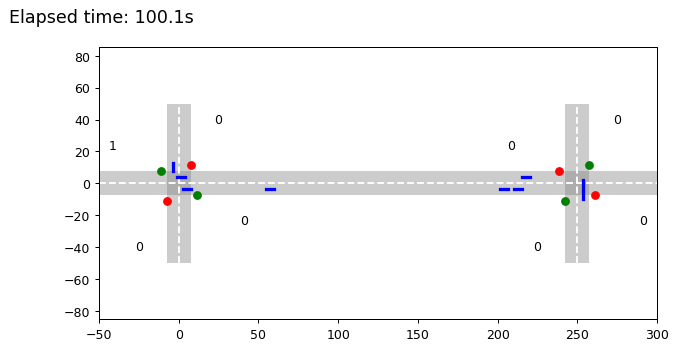

In [4]:
network_1.simulate(delta_t=0.1, end_time=100, animate=True, fig_width=8, file_name="figs/simulation_1x2.mp4", speed=1)

View the video below.

In [5]:
HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="figs/simulation_1x2.mp4" type="video/mp4">
</video></div>""")

Dictionary with simulation stats.

In [ ]:
stats = network_1.get_stats()
print("Average wait time:", stats[(0,0)]["N"]["wait_time"], "s")

In [ ]:
fig, axs = network_1.plot_queue_stats(plt=plt, grid_ind=(0,0), direction='N', end_time=100, delta_t=0.1, traffic_light=adaptive_ns1,fig_size=(6,8))
#plt.savefig('figs/eastbound_(0,0)', bbox_inches='tight')

*Single queue with on/off memoryless service*

In [ ]:
network_2 = Model2.IntersectionNetworkSimulator()
network_2.initialize(grid_dimensions=(1,2), grid_distance=250)
network_2.set_queue_rate_parameters(grid_ind=(0,0), avg_departure_time=2, avg_arrival_time_n=10, avg_arrival_time_s=10, avg_arrival_time_e=10)
network_2.set_queue_rate_parameters(grid_ind=(0,1), avg_departure_time=2, avg_arrival_time_n=10, avg_arrival_time_s=10, avg_arrival_time_w=10)
network_2.set_traffic_lights(grid_ind=(0,0), traffic_light_ns=memoryless_ns1, traffic_light_ew=memoryless_ew1)
network_2.set_traffic_lights(grid_ind=(0,1), traffic_light_ns=memoryless_ns2, traffic_light_ew=memoryless_ew2)

In [ ]:
network_2.simulate(delta_t=0.1, end_time=100, animate=True, fig_size=(8,10), file_name="figs/simulation2.mp4", speed=3)

In [ ]:
HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="figs/simulation2.mp4" type="video/mp4">
</video></div>""")

In [ ]:
stats = network_2.get_stats()
print("Average wait time:", stats[(0,0)]["N"]["wait_time"], "s")

In [ ]:
fig, axs = network_2.plot_queue_stats(plt=plt, grid_ind=(0,0), direction='N', end_time=round(network_2.time), delta_t=0.1, fig_size=(8,10))
#plt.savefig('figs/northbound_(0,0)', bbox_inches='tight')

In [ ]:
bool(-0.0)